In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing;
from sklearn.model_selection import cross_validate as cross_validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

/Users/fredyyudiawan/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# start = datetime.datetime(2018,1,1)
# end = datetime.datetime(2019,1,30)
import datetime
from datetime import timedelta
forecast_out = 100 #Days from now

stock_ticker ='AMZN'

end = datetime.datetime.now()#-timedelta(7) #remove timedetla -1 to go to productions mode
start = datetime.datetime.now()-timedelta(300)

# benchmark = web.DataReader(stock_ticker, 'yahoo', start, end )
stock = web.DataReader(stock_ticker, 'yahoo', start, end)

In [3]:
stock['Low'].describe().transpose()

count     207.000000
mean     1865.735895
std       155.629635
min      1626.030029
25%      1758.169983
50%      1812.609985
75%      1923.255005
max      2386.050049
Name: Low, dtype: float64

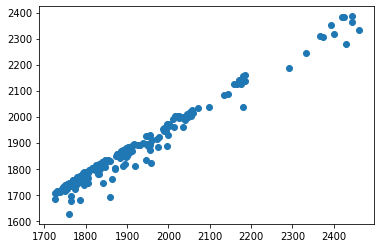

In [4]:
plt.scatter(stock['High'], stock['Low'])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
stock = stock.drop('Volume', axis=1)
stock =stock.drop('Adj Close', axis=1)
stock.columns

Index(['High', 'Low', 'Open', 'Close'], dtype='object')

In [7]:
y = stock.drop('Open', axis=1).values
X= stock['Open'].values


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model = Sequential()
# input
model.add(Dense(500, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

# output 
model.add(Dense(3))
model.compile(optimizer ='adam', loss='mse')

In [12]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [13]:
model.fit(x=X_train, y =y_train, validation_data =(X_test, y_test), batch_size=100, epochs=10000 ,callbacks =[early_stop])

Train on 165 samples, validate on 42 samples
Epoch 1/10000
165/165 [==============================] - 2s 12ms/sample - loss: 3373667.5227 - val_loss: 2147120.7500
Epoch 2/10000
165/165 [==============================] - 0s 821us/sample - loss: 1656670.0568 - val_loss: 101764.5156
Epoch 3/10000
165/165 [==============================] - 0s 808us/sample - loss: 487369.9015 - val_loss: 502324.0000
Epoch 4/10000
165/165 [==============================] - 0s 825us/sample - loss: 661105.0123 - val_loss: 36172.6133
Epoch 5/10000
165/165 [==============================] - 0s 782us/sample - loss: 181430.1155 - val_loss: 415556.4688
Epoch 6/10000
165/165 [==============================] - 0s 731us/sample - loss: 446540.3239 - val_loss: 468870.0625
Epoch 7/10000
165/165 [==============================] - 0s 677us/sample - loss: 441595.0388 - val_loss: 189771.2812
Epoch 8/10000
165/165 [==============================] - 0s 681us/sample - loss: 239379.7188 - val_loss: 11637.2520
Epoch 9/10000
165/1

165/165 [==============================] - 0s 841us/sample - loss: 64207.0810 - val_loss: 3315.1838
Epoch 00071: early stopping


In [14]:
losses = pd.DataFrame(model.history.history)

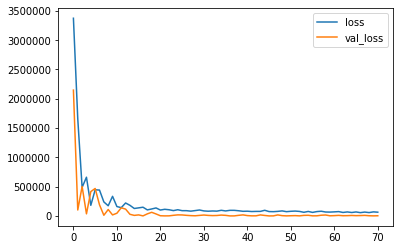

In [15]:
losses.plot()

In [16]:
predictions =model.predict_classes(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [18]:
mean_squared_error(X_test, predictions)

3609870.965740716

In [19]:
explained_variance_score(X_test, predictions)

0.0

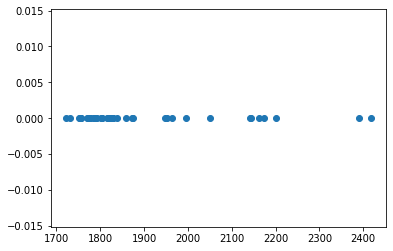

In [20]:
plt.scatter(X_test, predictions)


In [21]:
from tensorflow.keras.models import load_model

In [22]:
model.save(stock_ticker+'.h5')  

In [23]:
stock_price = X= stock['Open'].tail(1).values

In [24]:
stock_price

array([2330.01000977])

In [29]:
stock_price = np.array([2330.23])

In [30]:
stock.columns

Index(['High', 'Low', 'Open', 'Close'], dtype='object')

In [31]:
model.predict(stock_price)

array([[2295.751 , 2224.4485, 2271.9058]], dtype=float32)

In [28]:
stock_price = np.array([2417.00])

stock.columns

model.predict(stock_price)

array([[2381.2275, 2307.2693, 2356.4944]], dtype=float32)